In [1]:
# import modules and define functions
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, ticker, cm
import matplotlib as mpl
import os

In [2]:
outfs_dimer = [i for i in os.listdir(os.getcwd()) if i.endswith('.out') and 'H2' in i]
outfs_mononer = [i for i in os.listdir(os.getcwd()) if i.endswith('.out') and 'H_' in i]
data_dimer_dict = {}
data_monomer_dict = {}
for outf in outfs_dimer:
    mult = outf.split('_')[2]
    sd = outf.split('_')[3]
    lines = open(outf, 'r').read().splitlines()
    if sd == 'RCCSD-T':
        t1s = []
        t2s = []
    for i, line in enumerate(lines):
        if '%paras' in line:
            nstep = 20
        if "The Calculated Surface using the 'Actual Energy'" in line:
            data = lines[i+1:i+1+nstep]
            data = [list(filter(None, i.split(' '))) for i in data]
            keys, es = np.array(sorted(tuple(np.array(data, dtype=float).tolist()))).T
            break
        if sd == 'RCCSD-T':
            if 'T1 diagnostic' in line:
                t1 = float(list(filter(None, line.split(' ')))[3])
                t1s.append(t1)
            if 'LARGEST AMPLITUDES' in line:
                t2 = float(list(filter(None, lines[i+2].split(' ')))[4])
                t2s.append(t2)
    data_dimer_dict[sd] = es

for outf in outfs_mononer:
    lines = open(outf, 'r').read().splitlines()
    for i, line in enumerate(lines):
        if 'FINAL SINGLE' in line:
            e_monomer = float(list(filter(None, line.split(' ')))[4])
            break

data_dict = {}
for key in data_dimer_dict.keys():
    data_dict[key] = data_dimer_dict[key] - np.array(e_monomer) * 2
    

In [3]:
df = pd.DataFrame(data_dict, dtype=float)
df.index = keys

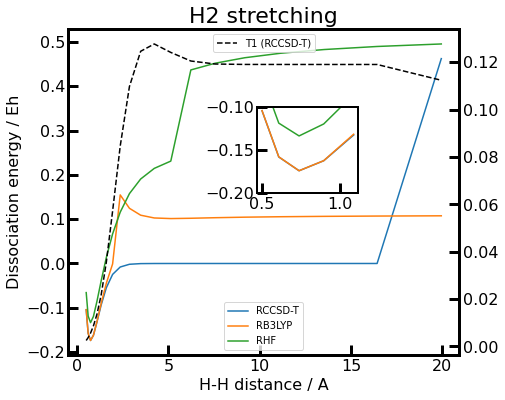

In [11]:
# plot the change of energy 
xlabel = 'H-H distance / A'
ylabel = 'Dissociation energy / Eh'
title = 'H2 stretching'
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 3
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 3
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

# plotting
fig, ax = plt.subplots(figsize=(7,6))
ax_small = plt.axes([0.5, 0.5, 0.2, 0.2])
for axis in ['top', 'bottom', 'left', 'right']:
    ax_small.spines[axis].set_linewidth(2)
ax_small.set_ylim(-0.2, -0.1)
# ax_small.set_xlabel(xlabel, fontsize=12)
# ax_small.set_ylabel(ylabel, fontsize=12)
ax2 = ax.twinx()
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
# ax.set_ylim(-9, -4)
# ax.set_xlim(0.69,1.01)
ax.set_xlabel(xlabel, fontsize=16)
ax.set_ylabel(ylabel, fontsize=16)
ax.set_title(title, fontsize=22)
for key in df.columns: 
    ax.plot(df.index, df[key], label=key)
    ax_small.plot(df.index[:5], df[key].values[:5], label=key)
ax2.plot(df.index, t1s, 'k--', label='T1 (RCCSD-T)')
# ax2.plot(df.index, t2s, 'k--', label='T2 (RCCSD-T)')
ax.legend(loc='lower center')
ax2.legend(loc='upper center')
